## Supervised Learning
## Project: Finding Donors for *CharityML*

In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data.income[data.income == '>50K'].count()

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data.income[data.income == '<=50K'].count()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round(n_greater_50k/n_records *100,2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

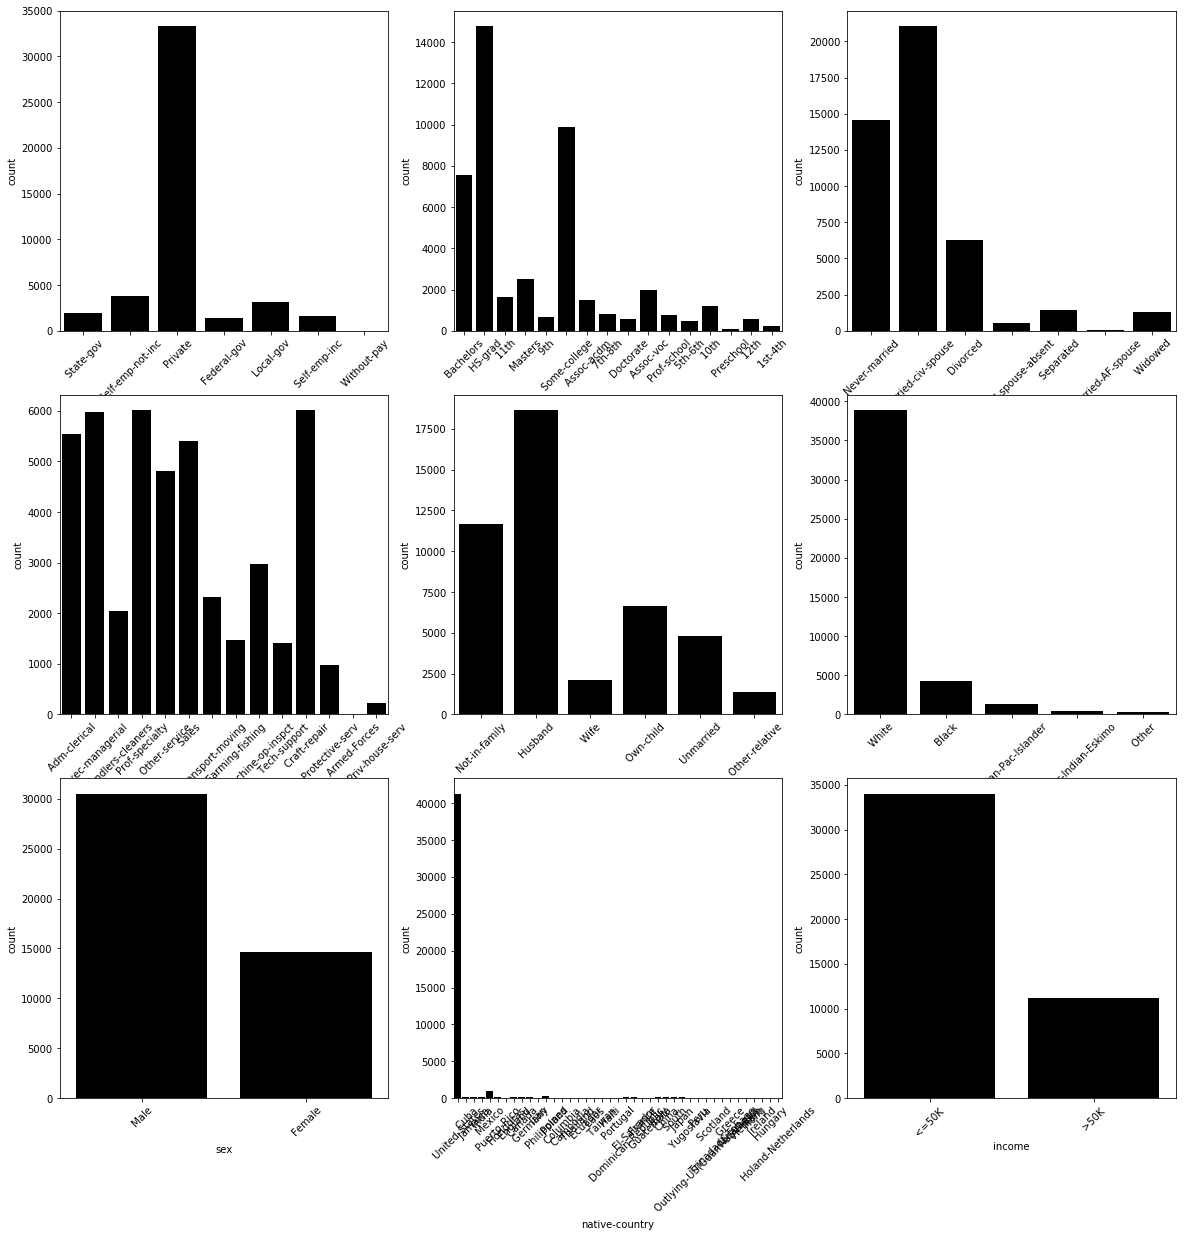

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
cat_var = data.dtypes[data.dtypes == 'object'].index.values
fig, axs = plt.subplots(3,3, figsize = (20,20))
for idx, ax in enumerate(axs.flatten()):
    sns.countplot(data = data, x = cat_var[idx] , ax = ax, color='black')
    ax.tick_params(axis= 'x', rotation = 45)

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

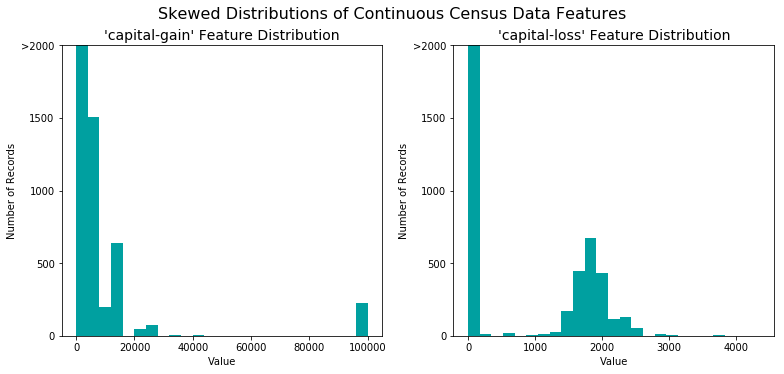

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

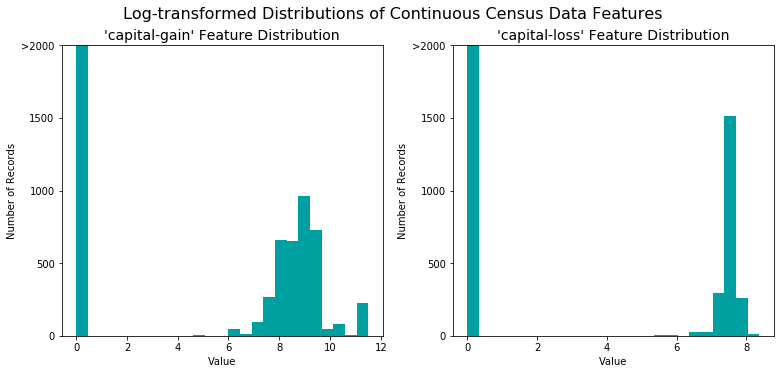

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [7]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({"<=50K": 0, ">50K": 1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
# print(encoded)

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [9]:
beta = 0.5

TP = np.sum(income) # Counting the ones as this is the naive case.
FP = income.count() - TP # Specific to the naive case
TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP + TN)/income.count()
recall = TP/(TP + FN)
precision = TP/(TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + beta**2) * precision*recall/(beta**2 * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

### Model to be used:

**Model 1: GaussianNB**<br>
Guassian Naive Bayes is commonly applied in spam detection and document classification. <br>
It has the ability to handle an extremely large number of features (e.g. bag of words), it is very fast and simple to train and it rarely overfits. <br>
However, the naive assumption of independence of features can be easily violated, leading to suboptimal performance. Though it can classify data decently, it is a bad estimator such that the probability prediction is not meaningful most of the time, especially on rare events.<br>
This model is chosen as there is a large number of features. Given the model is simple and fast to train, without a lot of tunable parameters, it can be treated as a baseline to beat for the other more complex models.

**Model 2: Logistic Regression** <br>
Logistic Regression is commonly applied for binary classification problems encountered, e.g., whether someone would be infected by a virus or if someone is predicted to be depressed based on bag od words from the corpus.<br>
It is simple to understand and explain, and works well on predicting probabilities of events. Regularization parameters can also be utilized to help in feature selection. <br>
However, it works poorly when there are outliers. It also has high bias and low variance as it is difficult to be trained with nonlinear functions.<br>
This model is chosen as the output of the current problem is a binary classification problem, which is best tackled by logistic regression. Moreover, the coefficients of the trained model will allow us to understand the relative importance of each features, while application of regularization will help us select the best features.

**Model 3: AdaBoost**<br>
AdaBoost is commonly used in Face Detection as it excels in complex boundary detection . <br>
It is a very versatile model as it handles missing values well and it does not need transformation of variables. It seldoms overfit the data even given a high no. of iterations and generally provide a decent performance. <br>
However, the algorithm is sensitive to noisy data and outlier as the error of misclassified points(outliers falls into this categories most of the time) are magnified in the process.<br>
Given its high flexibility, the model can handle both classification and regression problems and it could be used with our current dataset, which is a classification problem.

**References:** 
1. https://www.analyticsvidhya.com/blog/2015/05/boosting-algorithms-simplified/
2. https://www.dummies.com/programming/big-data/data-science/machine-learning-dummies-cheat-sheet/
3. https://www.quora.com/What-are-applications-of-linear-and-logistic-regression
4. https://dzone.com/articles/introduction-6-machine
5. https://towardsdatascience.com/the-logistic-regression-algorithm-75fe48e21cfa

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train,0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test,0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


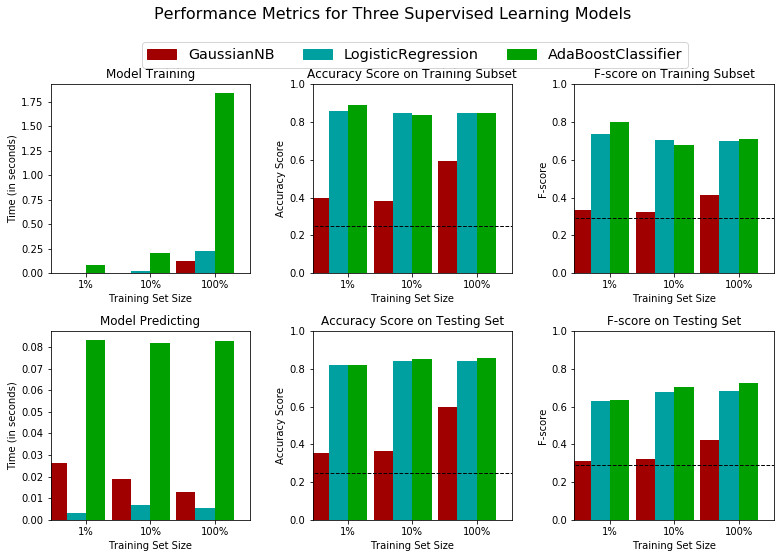

In [13]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = LogisticRegression(random_state= 0)
clf_C = AdaBoostClassifier(random_state= 0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

In [14]:
for key in results.keys():
    f_test_final = results[key][2]['f_test']
    print(f"F-score on Test data ({key}, 100%): {f_test_final:.4f}")

F-score on Test data (GaussianNB, 100%): 0.4209
F-score on Test data (LogisticRegression, 100%): 0.6832
F-score on Test data (AdaBoostClassifier, 100%): 0.7246


**Answer:**<br>
All 3 models perform better than tha Naive baseline(model that always predicts 1) in terms of f-score and accuracy. <br>

The **AdaBoost** model perform the best on the census data. <br>
It has an F-score of 0.725, the highest among the 3 models when trained with 100% of data. <br>
However, it has the longest training time and prediction time, indicating a relatively high computation cost. Since a run-time prediciton is not needed here, computation cost is considered a less important factor in choosing the best model. <br>
With its underlying mechanism of decision tree, the algorithm fits the characteristics of data we have, given its flexibility to handle both continuous and discrete variables.

Unexpectedly, the Gaussian Naive Bayes Classifier performed noticably poorer here, this could be due to the violation of its assumptions of independent variables bearing a normal distribution. Admittedly, the one-hot encoding in the preprocessing above created large number od binary features, which affected the performance of this model. Adopting the sklearn LabelEncoder function may help optimize the data structure for this model.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer:**<br>
The underlying mechanism of AdaBoost is Decision Trees. That is, you classify whether a person is making more than 50k based on a set of rules, e.g., if someone works more than 25hours a week or not, or if someone went to college or not. These rules are learnt from the census dataset such that we tried to get as many classification correct as possible (minimizing the error). However, usually the simple decision tree model may result in massive layers of decision rules that is too trivial and complicated that looks like the model has memorized all the data (high variance). <br>
AdaBoast is adaptive in a sense that it tries to use a sequence of weak learner applying simple decision rules on the data. Once a decision rule is applied by a weak learner, the later learner will draw another rule that tries to compensate for the mistakes the previous rule has made and this process continues as the model focus on increasingly difficult-to-classify points while still keeping the previous rules in mind. At the end, different weight is given to all the weak learners (decision rules)created and these rules converge into a powerful strong learner that gives a more generalizable predictive power compared with the simple decision tree model.<br>

**Reference:**
1. https://en.wikipedia.org/wiki/AdaBoost

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [15]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state = 0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators': [50,100,200,1000],
             'learning_rate': [0.8,1,1.2]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8676
Final F-score on the testing data: 0.7448


In [16]:
best_clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=1000, random_state=0)

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Naive Predictor   | Unoptimized Model(n=50) |Optimized (n=100) | Optimized (n=200) | Optimized (n=1000) |
| :------------: | :---------------: | :---------------: | :-------------: |:------------------:| :-----------------:| 
| Accuracy Score |      0.2478       |     0.8576           |     0.8606       |    0.8651       |      0.8676     |
| F-score        |      0.2917       |     0.7246           |     0.7316       |    0.7396       |      0.7448     |


**Answer:** <br>
The Optimized Model of Adaboost produced a better score after performing a grid search. <br>
Increasing the number of estimator from 50 to 1000 improves the model noticably with a decreasing margin of improvement. Further increase of no. of estimator in exchange of slightly better performance will inflict exponentially higher computation cost, which may not be cost-effective. <br> Changing learning rate did not improve the model. <br>
The Model, both before and after optimization performs much better than the Naive Predctor both in terms of accuracy and F-score.


----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

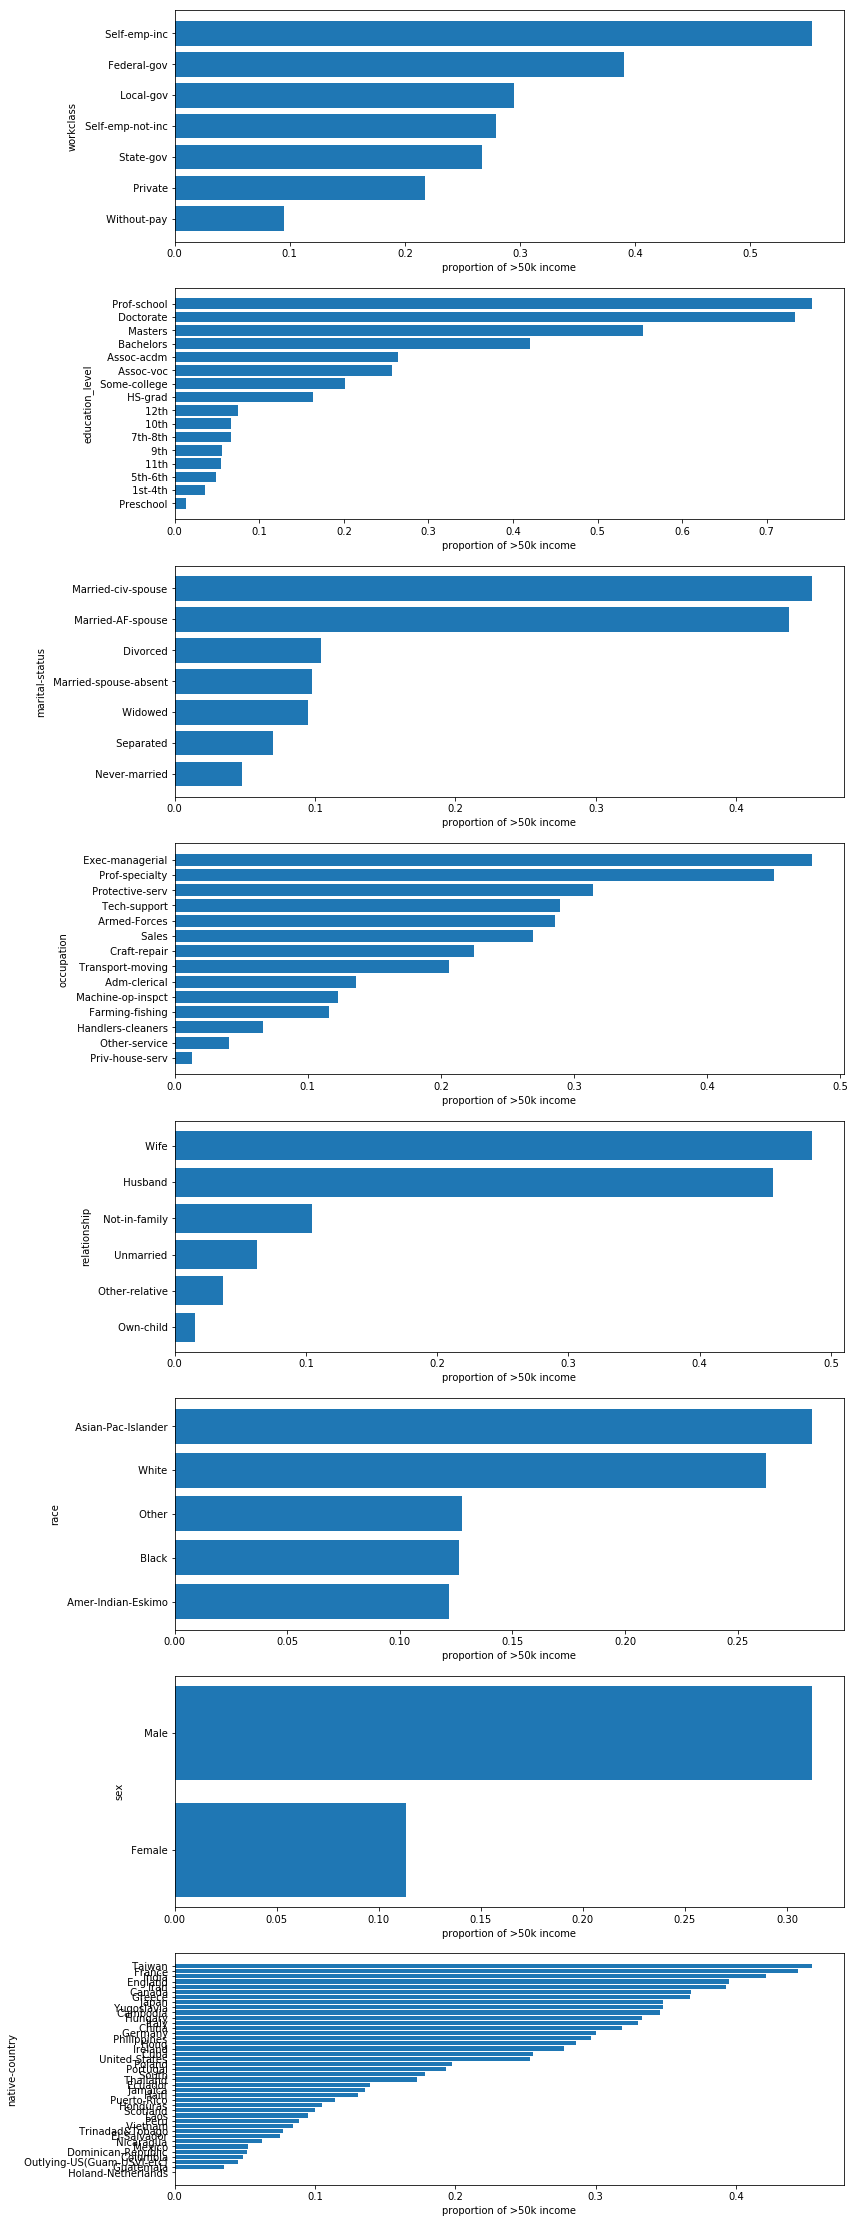

In [17]:
# Plotting the proportion of people having >50k income by group
data['income_group'] = data['income'].map({'<=50K': 0, '>50K':1})
fig, ax = plt.subplots(len(cat_var[:-1]), figsize = (12,40))
for i,key in enumerate(cat_var[:-1]):
    idx = np.argsort(data.groupby(key).income_group.mean())
    features = data.groupby(key).income_group.mean().index
    gp_mean = data.groupby(key).income_group.mean()
    ax[i].barh(range(len(features)), gp_mean[idx])
    plt.sca(ax[i])
    plt.yticks(range(len(features)),features[idx])
    plt.xlabel('proportion of >50k income')
    plt.ylabel(key)

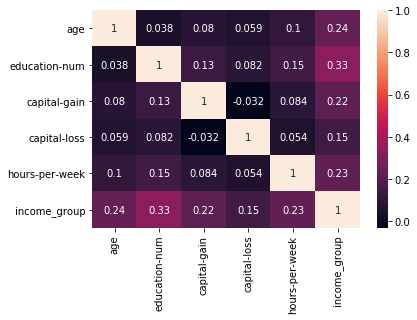

In [18]:
sns.heatmap(data.corr(), annot=True)

**Answer:**<br>
I believe the the Top5 important factors are as follows,
1. **Education level**: As shown in the above barchart, highly educated people, especially doctorate and prof-school earn significantly more than the other groups. The correlation matrix also showed a moderate correlation between years of education and income group. They tend to have more working opportunities and are more eligible for high-pay occupation. They are also more likely to have access to different resources, and are more likely to make investments. This make it the most important factor on my list.
2. **Occupation**: The range of income varies a lot between occupations, for instance, those in the group of Prof-specialty and Exec-managerial tend to have range of salary at the higher end of the spectrum while handlers-clearners will have lower salary in general. The wealth gap of different occupations may explain most of the variance of income.
3. **Sex**: Unfortunately, it is well reported that Males tends to earn more than Females given the same job position. This is as well shown in the above barcharts where Male are 3 times more likely to make more than 50K. Females tend to scrafice their career for their family but they could still earn more money if they are highly educated and work in the high-pay field.
4. **Age**: There is a moderate correlation between age and income group. Older people across occupations tend to have higher salary due to their working experience and have more passive income through investment fue to accumulated wealth. However, for the former, this may not hold true if their age passes 60 due to retirement, there could be a  non-linear relationship; for the latter, not all people make investments.
5. **Race**: Despite improving situation in recent years, unfortunately, white people are more likely to get hired and have a higher pay in the US ,while black people and other ethnic minorities have less social resources and education opportunities as they live in the poorer vicinity. Asian-Pac-Islander made an exception case.

It is suprising to find those as wife and husband and those married tend to earn more than the unmarried, which essmingly has no relationship with all the other factors. While this group of people may be older than the other groups but it does not make sense to me that people who get married are more educated and have a better occupation. Although these qualities make the male more attractive and more likely to be approach, it does not apply to females. <br>
They don't get into the list as I suspect the income reported in these groups are actually household income instead of individual income or there may be a sampling problem.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

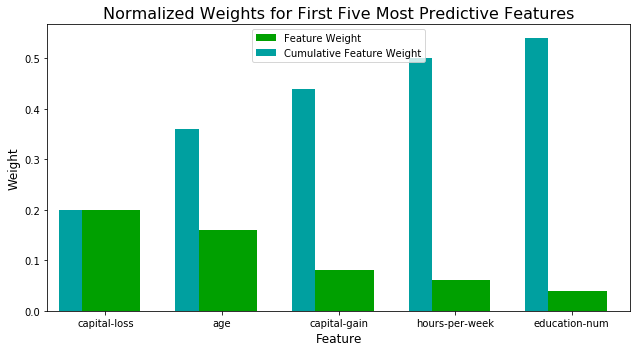

In [19]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier()
model.fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**<br>
Only the variable Age and Education-num(I predicted education-level though) matched with my predicitons. <br>
Age is found to be a more important factor compared with Education, I have underestimated the effect of increasing age, thus, increasing working experience on income. <br>
I am surprised to find captial-loss to be the most important factor and that the capital-gain is also on the list. However, this totally make sense as I can imagine people who can suffer from huge capital-loss are probably wealthy in the first place. Having extra money for investment means they are probably having a high income. <br>
I am also surprised to find working hours per week on the list as I expected working in a high-pay job is more relevent than working longer hours. It could be that people with high-pay job generally work longer hours and this is observed in the data as shown in the scatter plot below. (see the table below).

In a second thought, these 5 factors happened to be only 5 continuous variables of the dataset. All the features that I have performed one-hot encoding were all missing here. I have doubts that there are imcompatabiliy of one-hot encoding with the above methods to find the most important features. My guess is spliting categorical variables into binary one dilute the effects of the features towards the outcome. During the spliting process in a decision tree, these binary codes were less likely to be considered as they are sparse. The important features search in decision tree is determined by how frequent the feature is selected; the one-hot encoded features are diluted, their effects are counted seperately as each one-hot encoded clases and their overall effects not computed.

I have rerun the whole model training with numeric encoding instead at the end.

Reference:
1. https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/


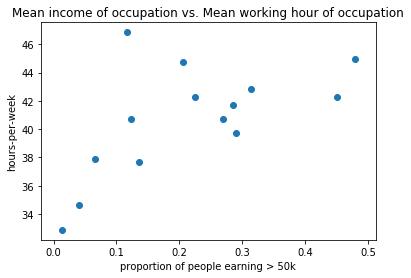

In [20]:
plt.scatter(data.groupby('occupation')['income_group'].mean(), data.groupby('occupation')['hours-per-week'].mean())
plt.ylabel('hours-per-week')
plt.xlabel('proportion of people earning > 50k');
plt.title('Mean income of occupation vs. Mean working hour of occupation');

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [21]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space

X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
start = time()
clf_reduced = (clone(best_clf)).fit(X_train_reduced, y_train)
end = time()
train_time_reduced = end - start

start = time()
clf = (clone(best_clf)).fit(X_train,y_train)
end = time()
train_time = end - start

# Make new predictions
start = time()
reduced_predictions = clf_reduced.predict(X_test_reduced)
end = time()
predict_time_reduced = end - start

start = time()
predictions = clf.predict(X_test)
end = time()
predict_time = end - start

# Performance metrics summary
accuracy_full = accuracy_score(y_test, predictions)
fbeta_full = fbeta_score(y_test, predictions, beta = 0.5)
accuracy_reduced = accuracy_score(y_test, reduced_predictions)
fbeta_reduced = fbeta_score(y_test, reduced_predictions, beta = 0.5)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_full))
print("F-score on testing data: {:.4f}".format(fbeta_full))
print(f"Train Time: {train_time:.3f}, predict_time: {predict_time:.3f}")

print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_reduced))
print("F-score on testing data: {:.4f}".format(fbeta_reduced))
print(f"Train Time: {train_time_reduced:.3f}, predict_time: {predict_time_reduced:.3f}")

print(f"""
Train Time saved: {100*(train_time-train_time_reduced)/train_time:.3f}%,
Predict Time saved: {100*(predict_time-predict_time_reduced)/predict_time:.3f}%,
Accuracy score dropped: {100*(accuracy_full - accuracy_reduced)/accuracy_full:.3f}%,
F-score dropped: {100*(fbeta_full - fbeta_reduced)/fbeta_full:.3f}%

""")
      

Final Model trained on full data
------
Accuracy on testing data: 0.8676
F-score on testing data: 0.7448
Train Time: 33.434, predict_time: 1.413

Final Model trained on reduced data
------
Accuracy on testing data: 0.8433
F-score on testing data: 0.7053
Train Time: 12.377, predict_time: 0.981

Train Time saved: 62.982%,
Predict Time saved: 30.534%,
Accuracy score dropped: 2.791%,
F-score dropped: 5.303%




### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**<br>
The final model suffers a slight drop of accuracy of 2.8% and a drop of F-score of 5.3%, while the training time reduced is 63.0%. <br>
If training time was a factor to consider whether a full model is needed, I will make my decision based on the comparison of the cost of the extra computational resource and time required to train the full model with the cost of having a lower precision, i.e., cost of sending donation materials to people who are unlikely to donate. In this case, as the training time can be significantly reduced with a slight sacrifice of precision of the model, I would go for the reduced data as the training set. <br>

Another solution would be spending more time on feature engineering with the following ways:
1. Removing redundent features, e.g., the Education_level - Education-num pair and the Relationship - Marital Status pair provide similar infomation.
2. Grouping and reducing the number of categories in features, e.g. Occupation may be reduced to occupations with high-pay, medium-pay and low-pay. 

Still, one more solution is to reduce the no. of estimators in Adaboost Model to save computation time.

## Further Exploration

As discussed above, one-hot encoding may not be suitable for GaussianNB algorithm and for exploring the most important features. The models are retrained, using numeric encoding instead for the categorical variables.

In [22]:
data['education_level'].unique()
education_level_dict = {' Preschool': 0,
                        ' 1st-4th' : 1,
                        ' 5th-6th': 2,
                       ' 7th-8th': 3,
                       ' 9th': 4,
                       ' 10th': 5,
                       ' 11th': 6,
                       ' 12th': 7,
                       ' HS-grad': 7,
                       ' Some-college':7,
                       ' Assoc-voc': 8,
                       ' Assoc-acdm': 8,
                        ' Bachelors': 9,
                        ' Masters': 10,
                        ' Doctorate':11,
                        ' Prof-school': 12}

In [23]:
# Using Numeric Encoding instead of One-hot Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

features_final_numeric = features_log_minmax_transform.copy()
features_final_numeric['workclass_num'] = le.fit_transform(features_log_minmax_transform.workclass)
features_final_numeric['education_level_num'] = features_log_minmax_transform.education_level.map(education_level_dict)
features_final_numeric['marital_status_num'] = le.fit_transform(features_log_minmax_transform['marital-status'])
features_final_numeric['occupation_num'] = le.fit_transform(features_log_minmax_transform['occupation'])
features_final_numeric['relationship_num'] = le.fit_transform(features_log_minmax_transform['relationship'])
features_final_numeric['race_num'] = le.fit_transform(features_log_minmax_transform['race'])
features_final_numeric['sex_num'] = le.fit_transform(features_log_minmax_transform['sex'])
features_final_numeric['native_country_num'] = le.fit_transform(features_log_minmax_transform['native-country'])

features_final_numeric = features_final_numeric.drop(cat_var[:-1], axis = 1)

# Print the number of features after numeric encoding
encoded = list(features_final_numeric.columns)
print("{} total features after numeric encoding.".format(len(encoded)))

13 total features after numeric encoding.


In [31]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final_numeric, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


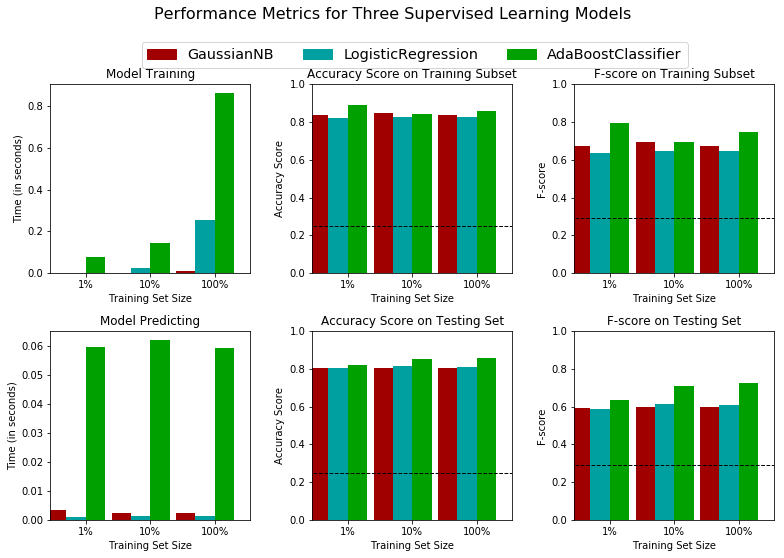

In [32]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Initialize the three models
clf_A = GaussianNB()
clf_B = LogisticRegression(random_state = 0)
clf_C = AdaBoostClassifier(random_state = 0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [33]:
# Get the values of F-score of the 3 models
for key in results.keys():
    f_test_final = results[key][2]['f_test']
    print(f"F-score on Test data ({key}, 100%): {f_test_final:.4f}")

F-score on Test data (GaussianNB, 100%): 0.5996
F-score on Test data (LogisticRegression, 100%): 0.6066
F-score on Test data (AdaBoostClassifier, 100%): 0.7231


In [34]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = AdaBoostClassifier(random_state = 0)

# Create the tuning parameters
parameters = {'n_estimators': [50,200,1000],
             'learning_rate': [1]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8565
F-score on testing data: 0.7231

Optimized Model
------
Final accuracy score on the testing data: 0.8674
Final F-score on the testing data: 0.7464


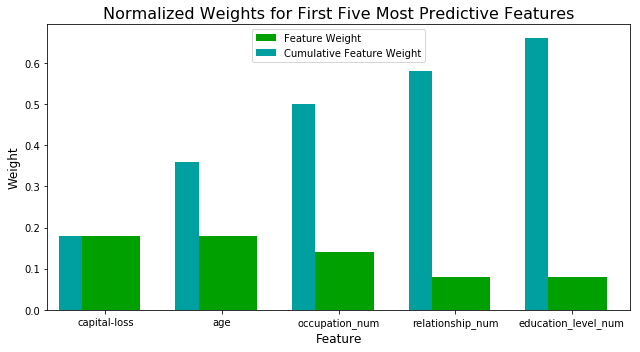

In [35]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier()
model.fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Discussion:

By using numeric encoding, Gaussian NB has performed much better than before. The numeric encoding of categorical variables made the distribution more 'normal' as compared with the discrete, 0-or-1 distribution in one-hot encoding. This fits better with the assumptions of the model. <br>
Using numeric encoding also reveals occupation, education level and relationship as more important factors.

**However**, there is an problem of ambiguity of the meaning of the numerical values of the categories. The models used intreprete the numerical values of the categorical variables not as independent categories but as ordinal values. While it is not difficult to encode education level in an asceding order, it does not make sense to encode race, native countries, occupation, relationship and marital staus in a way that some categories are considered 'greater' than the others. <br>

In conlusion, 
1. it is better to try further features engineering aforementioned to reduce the effect of dilution of categorical variables in decision trees,
2. Gaussian NB is not a suitable model for the current classification problem due to the existance of both continuous and categorical features.

##Before You Submit
You will also need run the following in order to convert the Jupyter notebook into HTML, so that your submission will include both files.

In [36]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook finding_donors.ipynb to html',
 '[NbConvertApp] Writing 909318 bytes to finding_donors.html']

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.